# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem, but to make it simple : predicting a continuous (numerical) variable based on some other combination of variables.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Creating data to view and fit

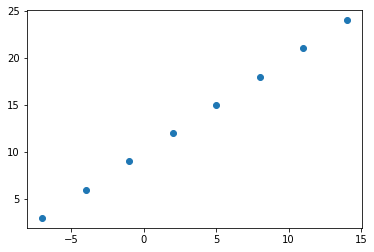

In [3]:
# Create features
X = np.array([-7., -4, -1, 2, 5, 8, 11, 14])

# Create labels
y = np.array([3., 6, 9, 12, 15, 18, 21, 24])

# Visualize it
plt.scatter(X,y)

In [4]:
X+10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [5]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [6]:
# Turning the NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X.shape, y.shape

(TensorShape([8]), TensorShape([8]))

In [7]:
X

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>

In [8]:
# Expand the dimension of a tensor : https://www.geeksforgeeks.org/python-tensorflow-expand_dims/
tf.expand_dims(X, axis=-1)

<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]])>

### Steps in modeling in TensorFlow

1. **Creating the model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling the model** - define the loss function (the function which will tells our model how far its from performing well), the optimizer (tells the model how to update its internal patterns to better its predictions) and the evaluation metrics (human interpretable values for how well the model is doing).
3. **Fitting the model** - letting the model try to find patterns between features and labels.
4. **Evaluation** - Evaluate the model on the test data (in order to know how reliable are the model's predictions ?)


In TensorFlow, there are two main way of creating a model :
* Sequential API
* Functional API

In [9]:
# Set a random seed (in order to have some reproducibility)
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # MAE : Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), # SGD : Stochastic Gradient Descent
              metrics=["mae"]
             )

# 3. Fit the model 
model.fit(tf.expand_dims(X, axis=-1),y, epochs=5)


Epoch 1/5
1/1 [==============================] - 0s 318ms/step - loss: 18.4300 - mae: 18.4300
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 18.1488 - mae: 18.1488
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 17.8675 - mae: 17.8675
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 17.5863 - mae: 17.5863
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 17.3050 - mae: 17.3050


**Note**  
A lot of function in TensorFlow, if they have a shortcut name (e.g. mae or SGD), can be replaced by a string variable to define the fact it is wished to used that specific function. For e.g., the step 2 in the above cell( Compile the model), can also be written as such : 

model.compile(loss="mae",  
              optimizer="sgd",  
              metrics=["mae"]  
             )

In [10]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
# Trying to make a prediction using our model
model.predict([17.])

1/1 [==============================] - 0s 85ms/step


array([[-13.892423]], dtype=float32)

The predicted value (y) should be 27 when X is 17. But we got -13.89, which is pretty far off. This is no surprising because the current MAE of our model is 17.3050, which means : on average, our model predict something that is 17.3050 points off where is should be (MAE).

In [12]:
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 34ms/step


array([[-13.892423]], dtype=float32)

In [13]:
y_pred + 17.3050

array([[3.4125776]], dtype=float32)

The value is still off. Now, we need to improve our model.

### Improving our model

We can improve our model by altering the steps we took to create a model.  

1. **Creating a model** - Here, we might :
* add more layers, 
* increase the number of hidden units (also called neurons) within each of th hidden layers, 
* change the activation function of each layer

2. **Compiling the model** - Here, we might :
* change the optimization function, or perhaps ,
* or perhaps changes the **learning rate** of the optimization funciton

3. **Fitting the model** - Here, we might :
* fit the model for more epochs (make it training for longer)
* fit the model on more data (give the model more examples to learn from)

In [ ]:
# 5. Improving the model
model.fit(tf.expand_dims(X, axis=-1),y, epochs=7)